# Identify feasible agents
This notebook is an example of getting all feasible agents for the "syndost" region's residents.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Description

In [2]:
df = pd.read_csv('plans_sydost.csv')
df

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
0,home,902869,07:23:02,0,NaN,532627.2066,6.510127e+06,00:00:00,input,0.000000,0:00:00,0.000000,263.040925,0.000000,NaN
1,work,902869,17:41:05,1,car,536376.5453,6.474406e+06,07:23:02,input,0.000000,0:31:52,31.875966,586.175641,81.875466,154.113853
2,home,902869,23:59:59,2,car,532627.2066,6.510127e+06,17:41:05,input,0.000000,0:31:52,31.875966,527.031501,81.882891,154.127828
3,home,902872,06:14:28,0,NaN,532200.4596,6.510011e+06,00:00:00,input,0.000000,0:00:00,0.000000,194.481148,0.000000,NaN
4,work,902872,16:27:08,1,car,569560.5745,6.494960e+06,06:14:28,input,0.000000,0:45:03,45.065413,567.598648,45.370882,60.406701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017130,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435


## 2. Data Filtration

In [3]:
#separating sysmo and matsim results (inputs and outputs) into two different data frames

string_value_to_delete = 'input'
column_name = 'src'
df_matsim = df[df[column_name] != string_value_to_delete]
df_matsim    #data frame with matsim results

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2508566,home,1000013,7:08:21,0,NaN,0.0000,0.000000e+00,0:00:00,output,132.431085,00:00:00,0.000000,428.366667,0.000000,NaN
2508567,work,1000013,15:55:56,1,car,541582.9998,6.471744e+06,7:08:21,output,132.431085,00:16:58,16.966667,510.600000,14.784064,52.281564
2508568,other,1000013,18:39:17,2,car,536088.3644,6.474925e+06,15:55:56,output,132.431085,00:11:11,11.183333,152.166667,7.924178,42.514217
2508569,home,1000013,23:59:58,3,car,537547.1673,6.481212e+06,18:39:17,output,132.431085,00:10:57,10.950000,309.750000,8.342137,45.710341
2508570,home,1000014,8:15:44,0,NaN,0.0000,0.000000e+00,0:00:00,output,106.657528,00:00:00,0.000000,495.750000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017130,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435


In [4]:
df_sysmo = df[df[column_name] == string_value_to_delete]
df_sysmo    #data frame with sysmo results

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
0,home,902869,07:23:02,0,NaN,532627.2066,6.510127e+06,00:00:00,input,0.0,0:00:00,0.000000,263.040925,0.000000,NaN
1,work,902869,17:41:05,1,car,536376.5453,6.474406e+06,07:23:02,input,0.0,0:31:52,31.875966,586.175641,81.875466,154.113853
2,home,902869,23:59:59,2,car,532627.2066,6.510127e+06,17:41:05,input,0.0,0:31:52,31.875966,527.031501,81.882891,154.127828
3,home,902872,06:14:28,0,NaN,532200.4596,6.510011e+06,00:00:00,input,0.0,0:00:00,0.000000,194.481148,0.000000,NaN
4,work,902872,16:27:08,1,car,569560.5745,6.494960e+06,06:14:28,input,0.0,0:45:03,45.065413,567.598648,45.370882,60.406701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508561,home,10196601,07:00:01,0,NaN,497388.1525,6.492976e+06,00:00:00,input,0.0,0:00:00,0.000000,240.024048,0.000000,NaN
2508562,work,10196601,14:30:23,1,car,485096.7068,6.471332e+06,07:00:01,input,0.0,0:28:56,28.936349,421.438871,34.084665,70.675118
2508563,other,10196601,15:10:50,2,car,500944.9941,6.488020e+06,14:30:23,input,0.0,0:28:56,28.936349,11.502754,30.837032,63.941097
2508564,other,10196601,15:51:16,3,car,501499.1044,6.490190e+06,15:10:50,input,0.0,0:28:56,28.936349,11.502754,3.777843,7.833419


In [5]:
df_sysmo.describe()

,PId,act_id,POINT_X,POINT_Y,score,trav_time_min,act_time,distance,speed
count,2.508566e+06,2.508566e+06,2.508566e+06,2.508566e+06,2508566.0,2.508566e+06,2.508566e+06,2.508566e+06,1.955803e+06
mean,4.666599e+06,2.132822e+00,5.133977e+05,6.371045e+06,0.0,1.557586e+01,3.011733e+02,1.418123e+01,inf
std,2.714155e+06,1.976849e+00,5.244458e+04,9.081600e+04,0.0,3.326695e+01,2.646785e+02,3.280719e+01,NaN
min,9.028690e+05,0.000000e+00,2.791279e+05,6.134333e+06,0.0,-1.437625e+03,1.087328e-04,0.000000e+00,-6.042293e+16
25%,1.286191e+06,1.000000e+00,4.743002e+05,6.293947e+06,0.0,1.520172e+00,5.080377e+01,8.316788e-01,1.445267e+01
50%,4.138177e+06,2.000000e+00,5.161505e+05,6.373969e+06,0.0,1.169092e+01,2.421970e+02,4.573397e+00,3.072533e+01
75%,6.802544e+06,3.000000e+00,5.565129e+05,6.466202e+06,0.0,2.262022e+01,5.201575e+02,1.584729e+01,7.024933e+01
max,1.019660e+07,1.900000e+01,8.345720e+05,7.463762e+06,0.0,1.800000e+02,1.409643e+03,1.567446e+03,inf


In [6]:
#showing sysmo datasets with feasible travel time 
df_sysmo_feasible_TT = df_sysmo[df_sysmo['trav_time_min'] >= 0]
df_sysmo_feasible_TT       #1171 rows are omitted

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
0,home,902869,07:23:02,0,NaN,532627.2066,6.510127e+06,00:00:00,input,0.0,0:00:00,0.000000,263.040925,0.000000,NaN
1,work,902869,17:41:05,1,car,536376.5453,6.474406e+06,07:23:02,input,0.0,0:31:52,31.875966,586.175641,81.875466,154.113853
2,home,902869,23:59:59,2,car,532627.2066,6.510127e+06,17:41:05,input,0.0,0:31:52,31.875966,527.031501,81.882891,154.127828
3,home,902872,06:14:28,0,NaN,532200.4596,6.510011e+06,00:00:00,input,0.0,0:00:00,0.000000,194.481148,0.000000,NaN
4,work,902872,16:27:08,1,car,569560.5745,6.494960e+06,06:14:28,input,0.0,0:45:03,45.065413,567.598648,45.370882,60.406701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508561,home,10196601,07:00:01,0,NaN,497388.1525,6.492976e+06,00:00:00,input,0.0,0:00:00,0.000000,240.024048,0.000000,NaN
2508562,work,10196601,14:30:23,1,car,485096.7068,6.471332e+06,07:00:01,input,0.0,0:28:56,28.936349,421.438871,34.084665,70.675118
2508563,other,10196601,15:10:50,2,car,500944.9941,6.488020e+06,14:30:23,input,0.0,0:28:56,28.936349,11.502754,30.837032,63.941097
2508564,other,10196601,15:51:16,3,car,501499.1044,6.490190e+06,15:10:50,input,0.0,0:28:56,28.936349,11.502754,3.777843,7.833419


In [7]:
df_matsim.describe()

,PId,act_id,POINT_X,POINT_Y,score,trav_time_min,act_time,distance,speed
count,2.508566e+06,2.508566e+06,2.508566e+06,2.508566e+06,2.508566e+06,2.508566e+06,2.508566e+06,2.508566e+06,1.952489e+06
mean,4.666599e+06,2.132822e+00,4.000762e+05,4.967396e+06,8.177868e+01,1.610246e+01,3.011763e+02,1.418123e+01,4.377142e+01
std,2.714155e+06,1.976849e+00,2.177333e+05,2.641910e+06,6.623594e+01,2.906741e+01,2.437019e+02,3.280719e+01,1.906175e+01
min,9.028690e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.189662e+03,0.000000e+00,-1.440000e+03,0.000000e+00,0.000000e+00
25%,1.286191e+06,1.000000e+00,4.222573e+05,6.225490e+06,6.249968e+01,1.916667e+00,7.506667e+01,8.316788e-01,3.070134e+01
50%,4.138177e+06,2.000000e+00,4.899478e+05,6.322008e+06,1.057197e+02,7.850000e+00,2.915917e+02,4.573397e+00,4.113813e+01
75%,6.802544e+06,3.000000e+00,5.409354e+05,6.420050e+06,1.247426e+02,1.951667e+01,4.913958e+02,1.584729e+01,5.578566e+01
max,1.019660e+07,1.900000e+01,8.345720e+05,7.463762e+06,1.423228e+02,1.300317e+03,1.437783e+03,1.567446e+03,9.192364e+03


In [8]:
unique_values = sorted(df_matsim['PId'].unique())
sorted_df_matsim = pd.DataFrame({'PId': unique_values})
sorted_df_matsim    #number of unique agents in the MATSim dataset

,PId
0,902869
1,902872
2,902873
3,902879
4,902881
...,...
552720,10196591
552721,10196592
552722,10196594
552723,10196598


In [9]:
#excluding agents having at least one negative utility score in matsim dataframe
person_ids_with_negative_score = df_matsim[df_matsim['score'] < 0]['PId'].unique()
df_feasible = df_matsim[~df_matsim['PId'].isin(person_ids_with_negative_score)]
df_feasible           #a total of 255495 rows are excluded from the initial dataset

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2508566,home,1000013,7:08:21,0,NaN,0.0000,0.000000e+00,0:00:00,output,132.431085,00:00:00,0.000000,428.366667,0.000000,NaN
2508567,work,1000013,15:55:56,1,car,541582.9998,6.471744e+06,7:08:21,output,132.431085,00:16:58,16.966667,510.600000,14.784064,52.281564
2508568,other,1000013,18:39:17,2,car,536088.3644,6.474925e+06,15:55:56,output,132.431085,00:11:11,11.183333,152.166667,7.924178,42.514217
2508569,home,1000013,23:59:58,3,car,537547.1673,6.481212e+06,18:39:17,output,132.431085,00:10:57,10.950000,309.750000,8.342137,45.710341
2508570,home,1000014,8:15:44,0,NaN,0.0000,0.000000e+00,0:00:00,output,106.657528,00:00:00,0.000000,495.750000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017130,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435


In [10]:
#excluding agents having at least one negative activity time in matsim dataframe

person_ids_with_negative_activity_time = df_feasible[df_feasible['act_time'] < 0]['PId'].unique()
df_filtered = df_feasible[~df_feasible['PId'].isin(person_ids_with_negative_activity_time)]
df_filtered           #further deduction of 10349 rows from the feasible score dataset

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2508566,home,1000013,7:08:21,0,NaN,0.0000,0.000000e+00,0:00:00,output,132.431085,00:00:00,0.000000,428.366667,0.000000,NaN
2508567,work,1000013,15:55:56,1,car,541582.9998,6.471744e+06,7:08:21,output,132.431085,00:16:58,16.966667,510.600000,14.784064,52.281564
2508568,other,1000013,18:39:17,2,car,536088.3644,6.474925e+06,15:55:56,output,132.431085,00:11:11,11.183333,152.166667,7.924178,42.514217
2508569,home,1000013,23:59:58,3,car,537547.1673,6.481212e+06,18:39:17,output,132.431085,00:10:57,10.950000,309.750000,8.342137,45.710341
2508570,home,1000014,8:15:44,0,NaN,0.0000,0.000000e+00,0:00:00,output,106.657528,00:00:00,0.000000,495.750000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017130,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435


In [11]:
#saving the list containing activities of feasible agents to a csv file

file_path = 'C:/Users/kaniska/jupyter notebook/plans_sydost_feasible_activity_schedules.csv'
df_filtered.to_csv(file_path, index=False)
pd.read_csv(file_path)

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
0,home,1000013,7:08:21,0,NaN,0.0000,0.000000e+00,0:00:00,output,132.431085,00:00:00,0.000000,428.366667,0.000000,NaN
1,work,1000013,15:55:56,1,car,541582.9998,6.471744e+06,7:08:21,output,132.431085,00:16:58,16.966667,510.600000,14.784064,52.281564
2,other,1000013,18:39:17,2,car,536088.3644,6.474925e+06,15:55:56,output,132.431085,00:11:11,11.183333,152.166667,7.924178,42.514217
3,home,1000013,23:59:58,3,car,537547.1673,6.481212e+06,18:39:17,output,132.431085,00:10:57,10.950000,309.750000,8.342137,45.710341
4,home,1000014,8:15:44,0,NaN,0.0000,0.000000e+00,0:00:00,output,106.657528,00:00:00,0.000000,495.750000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242717,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
2242718,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
2242719,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
2242720,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435


In [12]:
unique_values_new = sorted(df_filtered['PId'].unique())
sorted_df_matsim_filtered = pd.DataFrame({'PId': unique_values_new})
sorted_df_matsim_filtered    #number of unique agents in the filtered MATSim dataset 

#comparing with the sorted_df_matsim dataframe
#Drop of 31785 agents in the filtered MATSim dataset (approx. 5.75% from original dataset) 

,PId
0,902869
1,902872
2,902873
3,902879
4,902881
...,...
520935,10196591
520936,10196592
520937,10196594
520938,10196598


In [13]:
#saving the list of infeasible agents to a csv file

missing_rows = sorted_df_matsim[~sorted_df_matsim['PId'].isin(sorted_df_matsim_filtered['PId'])]
sorted_missing_rows = missing_rows.sort_values(by='PId')
sorted_missing_rows

file_path = 'C:/Users/kaniska/jupyter notebook/plans_sydost_infeasible_agents.csv'
sorted_missing_rows.to_csv(file_path, index=False)
pd.read_csv(file_path)

,PId
0,902987
1,902998
2,903078
3,903095
4,903104
...,...
31780,10196267
31781,10196358
31782,10196407
31783,10196476


In [12]:
#saving the list of feasible agents to a csv file

file_path = 'C:/Users/kaniska/jupyter notebook/plans_sydost_feasible_agents.csv'
sorted_df_matsim_filtered.to_csv(file_path, index=False)
pd.read_csv(file_path)

,PId
0,902869
1,902872
2,902873
3,902879
4,902881
...,...
520935,10196591
520936,10196592
520937,10196594
520938,10196598


In [13]:
#finding missing values in matsim dataset
df_filtered.isna().sum()    #2979 entries with missing speed values where activity id is not zero

act_purpose           0
PId                   0
act_end               0
act_id                0
mode             520940
POINT_X               0
POINT_Y               0
dep_time              0
src                   0
score                 0
trav_time             0
trav_time_min         0
act_time              0
distance              0
speed            523919
dtype: int64

In [14]:
df_filtered['mode'].value_counts()

mode
car     1708834
bike       6527
pt         4383
walk       2038
Name: count, dtype: int64

## 3. Creating Mode-Specific Data Frames

In [15]:
column_name = 'mode'
specific_values = 'car'
df_filtered_car = df_filtered[df_filtered[column_name] == specific_values]
df_filtered_car     #car matsim output data

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2508567,work,1000013,15:55:56,1,car,541582.9998,6.471744e+06,7:08:21,output,132.431085,00:16:58,16.966667,510.600000,14.784064,52.281564
2508568,other,1000013,18:39:17,2,car,536088.3644,6.474925e+06,15:55:56,output,132.431085,00:11:11,11.183333,152.166667,7.924178,42.514217
2508569,home,1000013,23:59:58,3,car,537547.1673,6.481212e+06,18:39:17,output,132.431085,00:10:57,10.950000,309.750000,8.342137,45.710341
2508571,other,1000014,16:16:10,1,car,535017.9846,6.473537e+06,8:15:44,output,106.657528,00:15:34,15.566667,464.850000,10.326177,39.801109
2508572,home,1000014,23:59:58,2,car,537547.1673,6.481212e+06,16:16:10,output,106.657528,00:15:40,15.666667,448.150000,10.422835,39.917239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017130,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435


In [16]:
specific_values = 'bike'
df_filtered_bike = df_filtered[df_filtered[column_name] == specific_values]
df_filtered_bike     #bike matsim output data

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2508659,work,1000106,13:53:20,1,bike,537651.9625,6.474998e+06,5:39:54,output,64.598413,00:34:45,34.750000,458.700000,8.688022,15.000902
2508660,home,1000106,16:22:39,2,bike,537370.6153,6.481675e+06,13:53:20,output,64.598413,00:34:45,34.750000,114.550000,8.688022,15.000902
2510065,other,1000986,14:43:42,4,bike,525880.4075,6.471351e+06,12:43:12,output,69.028407,00:06:38,6.633333,113.883333,1.658361,15.000253
2510066,home,1000986,23:59:58,5,bike,524674.0874,6.471766e+06,14:43:42,output,69.028407,00:06:38,6.633333,549.633333,1.658361,15.000253
2510166,work,1001025,12:06:05,1,bike,528852.7049,6.484806e+06,6:41:04,output,33.788275,01:11:14,71.233333,253.783333,17.812189,15.003248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014983,work,998600,14:47:58,1,bike,526310.1885,6.485172e+06,7:35:03,output,55.775221,00:47:48,47.800000,385.100000,11.950523,15.000657
5014984,home,998600,17:04:14,2,bike,529591.1858,6.493759e+06,14:47:58,output,55.775221,00:47:48,47.800000,88.483333,11.950523,15.000657
5015358,work,998787,15:17:20,1,bike,529566.6133,6.485218e+06,6:43:06,output,74.341899,00:19:09,19.150000,495.083333,4.787522,15.000069
5015359,other,998787,16:26:47,2,bike,529166.9306,6.486511e+06,15:17:20,output,74.341899,00:07:02,7.033333,62.433333,1.758796,15.003949


In [17]:
specific_values = 'pt'
df_filtered_pt = df_filtered[df_filtered[column_name] == specific_values]
df_filtered_pt     #public transport matsim output data

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2509595,other,1000697,13:45:25,3,pt,542576.4790,6.466167e+06,11:57:53,output,61.780488,00:40:43,40.716667,66.816667,21.000406,30.946158
2509596,home,1000697,23:59:58,4,pt,537146.2725,6.481381e+06,13:45:25,output,61.780488,00:40:19,40.316667,574.250000,21.000406,31.253189
2509626,work,1000743,11:33:23,1,pt,536965.0940,6.474339e+06,6:57:23,output,75.692453,00:17:10,17.166667,258.850000,8.320194,29.080288
2509627,other,1000743,12:44:38,2,pt,539005.1322,6.470921e+06,11:33:23,output,75.692453,00:17:45,17.750000,53.483333,5.175182,17.493574
2509628,other,1000743,13:26:19,3,pt,539350.5488,6.470910e+06,12:44:38,output,75.692453,00:12:10,12.166667,29.533333,0.449268,2.215567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015111,home,998651,16:52:50,3,pt,532358.3817,6.487856e+06,15:43:37,output,57.041313,00:31:57,31.950000,37.283333,17.460833,32.790297
5015268,other,998739,8:36:16,1,pt,537278.6804,6.474333e+06,5:31:09,output,42.901450,00:34:45,34.750000,150.383333,16.591905,28.647893
5015269,home,998739,9:48:57,2,pt,531890.3695,6.485902e+06,8:36:16,output,42.901450,00:35:45,35.750000,36.916667,16.591905,27.846554
5017087,work,999972,16:34:39,1,pt,528137.2449,6.476590e+06,7:38:47,output,58.479620,00:42:32,42.533333,493.316667,13.673674,19.288882


In [18]:
specific_values = 'walk'
df_filtered_walk = df_filtered[df_filtered[column_name] == specific_values]
df_filtered_walk     #walking matsim output data

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
2509731,work,1000815,15:59:05,1,walk,537025.4649,6.481454e+06,9:06:45,output,85.939498,00:02:31,2.516667,409.800000,0.126163,3.007868
2509732,home,1000815,18:41:14,2,walk,537077.6897,6.481372e+06,15:59:05,output,85.939498,00:02:31,2.516667,159.650000,0.126163,3.007868
2509771,work,1000827,15:22:59,1,walk,536892.1339,6.481164e+06,7:46:51,output,68.719519,00:21:44,21.733333,434.416667,1.087389,3.001994
2509772,home,1000827,17:34:48,2,walk,537586.0665,6.480697e+06,15:22:59,output,68.719519,00:21:44,21.733333,110.083333,1.087389,3.001994
2509974,other,1000934,8:56:35,1,walk,525883.3905,6.471073e+06,7:46:07,output,48.601770,00:34:31,34.516667,35.950000,1.726501,3.001161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015634,other,998946,17:19:40,4,walk,537343.4863,6.481617e+06,16:37:13,output,17.678595,00:42:26,42.433333,0.000000,2.122143,3.000674
5015635,other,998946,17:36:58,5,walk,536924.8205,6.482135e+06,17:19:40,output,17.678595,00:17:19,17.316667,0.000000,0.866254,3.001457
5015636,home,998946,18:12:09,6,walk,537164.2444,6.480804e+06,17:36:58,output,17.678595,00:35:10,35.166667,0.000000,1.758694,3.000616
5016206,work,999379,14:41:38,1,walk,537997.8595,6.481208e+06,8:10:34,output,66.769000,00:19:53,19.883333,371.183333,0.994509,3.001034


## 4. Simulation Results - Comparative Plots 

Text(0.5, 1.0, 'Travel Time vs. Distance for Different Modes')

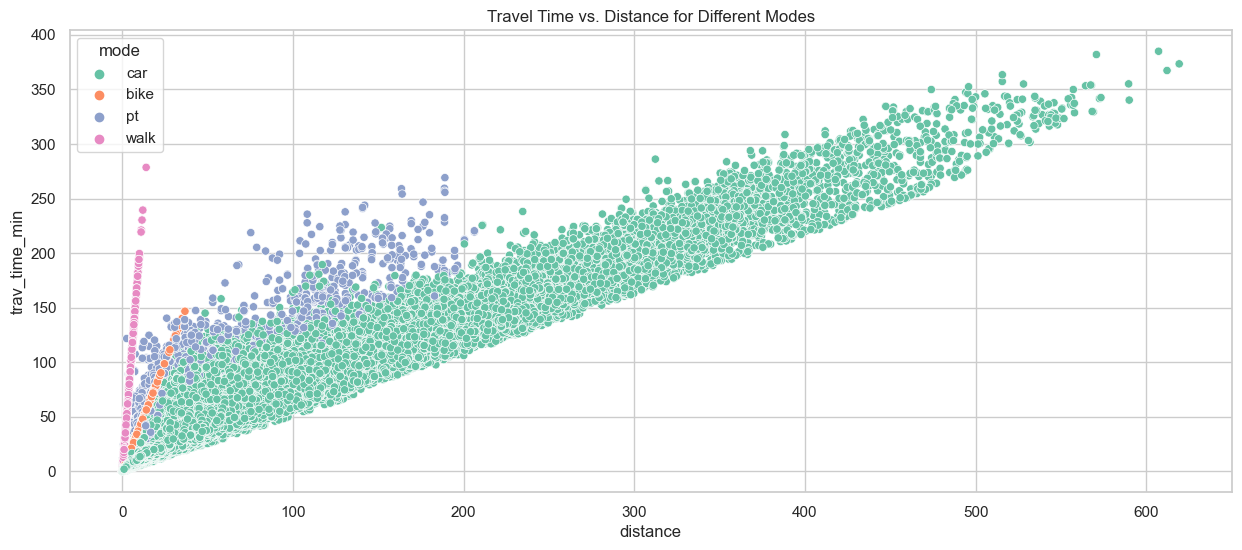

In [19]:
#plotting distance vs travel time for different modes

sns.set(style="whitegrid")
parameter1 = 'distance'
parameter2 = 'trav_time_min'
plt.figure(figsize=(15, 6))
sns.scatterplot(x=parameter1, y=parameter2, hue='mode', data=df_filtered, palette='Set2')

plt.title('Travel Time vs. Distance for Different Modes')

Text(0.5, 1.0, 'Average Distance Travelled by Different Modes')

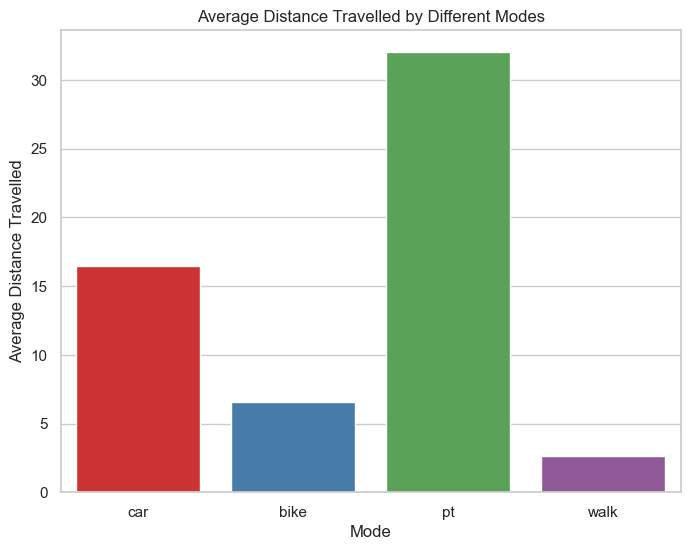

In [20]:
#plotting average distance travelled by different modes

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='mode', y='distance', data=df_filtered, errorbar=None, palette='Set1')

plt.xlabel('Mode')
plt.ylabel('Average Distance Travelled')
plt.title('Average Distance Travelled by Different Modes')

Text(0.5, 1.0, 'Average Travel Time by Different Modes')

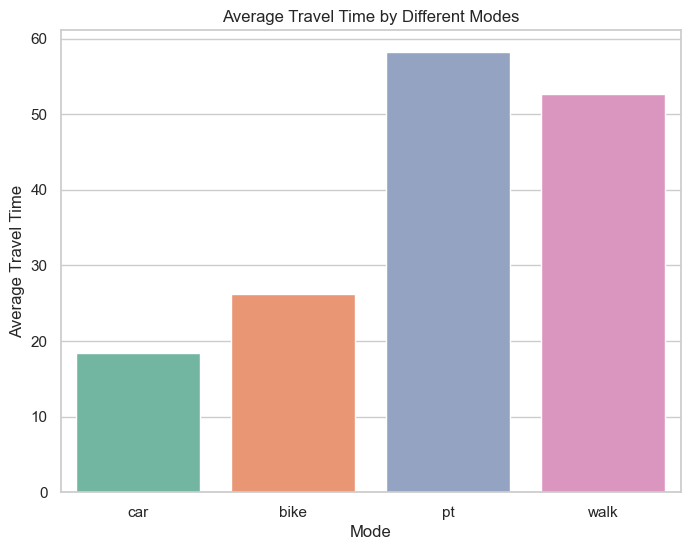

In [21]:
#plotting average travel time by different modes

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='mode', y='trav_time_min', data=df_filtered, errorbar=None, palette='Set2')

plt.xlabel('Mode')
plt.ylabel('Average Travel Time')
plt.title('Average Travel Time by Different Modes')

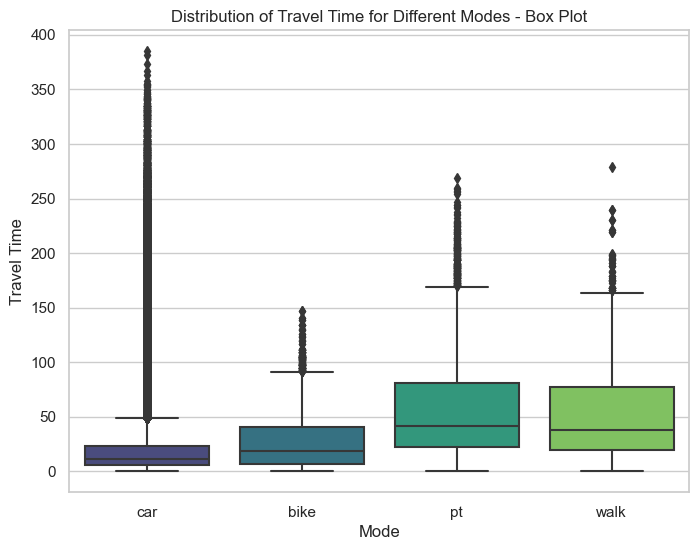

In [22]:
#travel time distribution of different modes

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='trav_time_min', data=df_filtered, palette='viridis')
plt.xlabel('Mode')
plt.ylabel('Travel Time')
plt.title('Distribution of Travel Time for Different Modes - Box Plot')
plt.show()

Text(0.5, 1.0, 'Frequency Distribution of Distance Travelled by Cars')

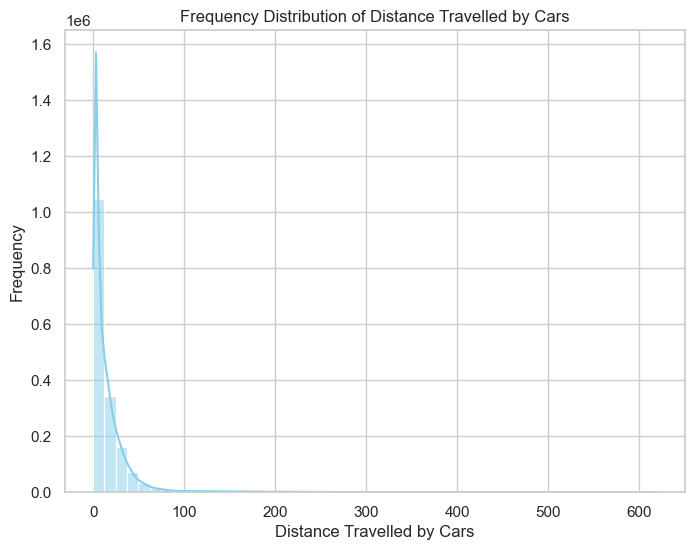

In [23]:
#plotting frequency distribution of distance travelled by cars

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered_car['distance'], bins=50, kde=True, color='skyblue')

plt.xlabel('Distance Travelled by Cars')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Distance Travelled by Cars')

Text(0.5, 1.0, 'Frequency Distribution of Log(Distance) Traveled by Cars')

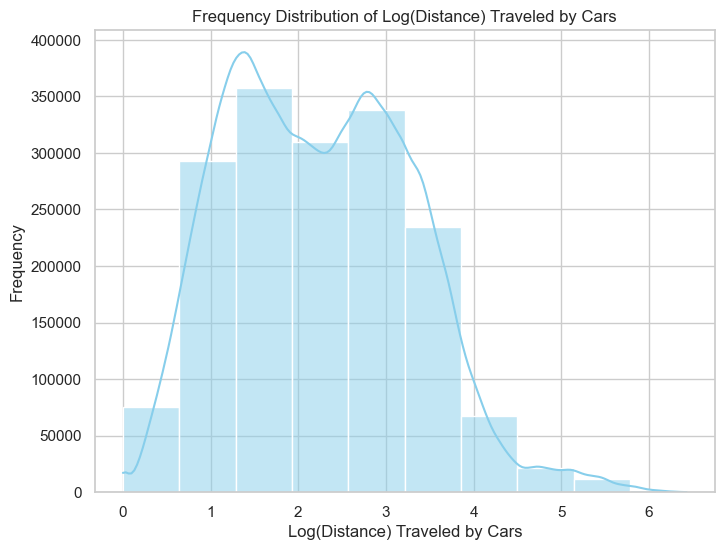

In [24]:
#plotting frequency distribution of log(distance) travelled by cars

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
log_distances = np.log1p(df_filtered_car['distance'])
sns.histplot(log_distances, bins=10, kde=True, color='skyblue')

plt.xlabel('Log(Distance) Traveled by Cars')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Log(Distance) Traveled by Cars')

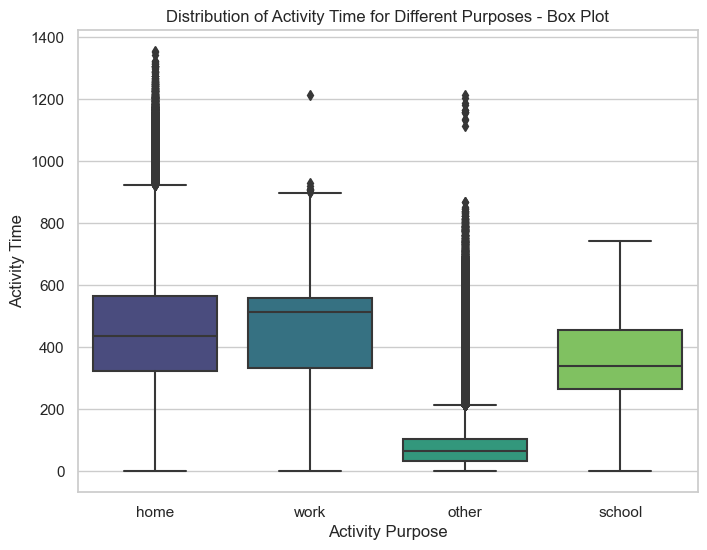

In [25]:
#boxplot of activity time distribution with respect to different purposes

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='act_purpose', y='act_time', data=df_filtered, palette='viridis')
plt.xlabel('Activity Purpose')
plt.ylabel('Activity Time')
plt.title('Distribution of Activity Time for Different Purposes - Box Plot')
plt.show()

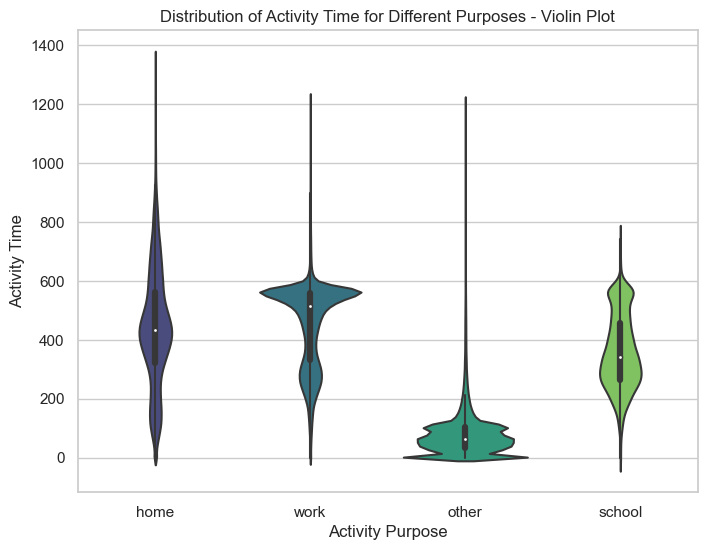

In [26]:
#violinplot of activity time distribution with respect to different purposes

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.violinplot(x='act_purpose', y='act_time', data=df_filtered, palette='viridis')
plt.xlabel('Activity Purpose')
plt.ylabel('Activity Time')
plt.title('Distribution of Activity Time for Different Purposes - Violin Plot')
plt.show()

## 5. Travel Time vs Distance for Sample Agent

In [27]:
#sample travel time comparison for a specific agent (PId 999987) 
column_to_sort = 'PId'
value_to_sort_by = 999987
df_sorted = df[df[column_to_sort] == value_to_sort_by].sort_values(by=column_to_sort)

In [28]:
df_sorted

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
144301,home,999987,08:22:50,0,NaN,536867.6555,6.482252e+06,00:00:00,input,0.000000,0:00:00,0.000000,322.842903,0.000000,NaN
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017126,other,999987,11:49:33,4,car,533827.5290,6.476629e+06,10:56:33,output,4.974517,00:13:53,13.883333,39.100000,10.980575,47.455067
5017125,home,999987,10:56:33,3,car,536867.6555,6.482252e+06,9:54:19,output,4.974517,00:13:05,13.083333,49.150000,10.163951,46.611752
5017124,other,999987,9:54:19,2,car,534202.8165,6.475412e+06,9:04:41,output,4.974517,00:02:24,2.400000,47.250000,1.345854,33.646361
5017123,other,999987,9:04:41,1,car,535113.1940,6.475564e+06,7:58:42,output,4.974517,00:11:38,11.633333,54.350000,9.283155,47.878736
5017122,home,999987,7:58:42,0,NaN,0.0000,0.000000e+00,0:00:00,output,4.974517,00:00:00,0.000000,478.700000,0.000000,NaN
144310,home,999987,23:59:59,9,car,536867.6555,6.482252e+06,16:09:14,input,0.000000,0:08:11,8.193633,642.563870,10.338488,75.706257


Text(0, 0.5, 'Travel Time')

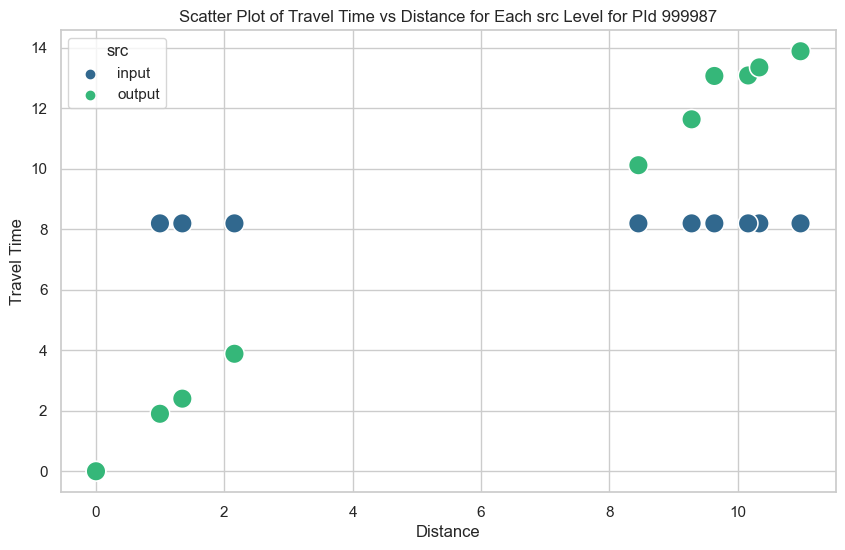

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#sns.lineplot(x='distance', y='trav_time_min', hue='src', data=df_sorted, marker='o')
sns.scatterplot(x='distance', y='trav_time_min', hue='src', data=df_sorted, palette='viridis', s=200)

plt.title('Scatter Plot of Travel Time vs Distance for Each src Level for PId 999987')
plt.xlabel('Distance')
plt.ylabel('Travel Time')

## 6. Activity Plan of an Example Agent

In [30]:
df_plans_output = df_sorted.loc[df_sorted.src=='output', :]
df_plans_output

,act_purpose,PId,act_end,act_id,mode,POINT_X,POINT_Y,dep_time,src,score,trav_time,trav_time_min,act_time,distance,speed
5017129,home,999987,15:20:46,7,car,536867.6555,6.482252e+06,13:38:16,output,4.974517,00:01:54,1.900000,100.616667,0.997005,31.484369
5017128,other,999987,13:38:16,6,car,536961.7837,6.481528e+06,12:24:13,output,4.974517,00:10:07,10.116667,63.933333,8.453680,50.137148
5017127,other,999987,12:24:13,5,car,534963.0836,6.475668e+06,11:49:33,output,4.974517,00:03:53,3.883333,30.783333,2.158153,33.344849
5017126,other,999987,11:49:33,4,car,533827.5290,6.476629e+06,10:56:33,output,4.974517,00:13:53,13.883333,39.100000,10.980575,47.455067
5017125,home,999987,10:56:33,3,car,536867.6555,6.482252e+06,9:54:19,output,4.974517,00:13:05,13.083333,49.150000,10.163951,46.611752
5017124,other,999987,9:54:19,2,car,534202.8165,6.475412e+06,9:04:41,output,4.974517,00:02:24,2.400000,47.250000,1.345854,33.646361
5017123,other,999987,9:04:41,1,car,535113.1940,6.475564e+06,7:58:42,output,4.974517,00:11:38,11.633333,54.350000,9.283155,47.878736
5017122,home,999987,7:58:42,0,NaN,0.0000,0.000000e+00,0:00:00,output,4.974517,00:00:00,0.000000,478.700000,0.000000,NaN
5017130,other,999987,16:27:40,8,car,535256.3214,6.475069e+06,15:20:46,output,4.974517,00:13:04,13.066667,53.816667,9.637633,44.254435
5017131,home,999987,23:59:58,9,car,536867.6555,6.482252e+06,16:27:40,output,4.974517,00:13:21,13.350000,438.966667,10.338488,46.465115


In [31]:
df_tst = pd.DataFrame()
df_tst.loc[:, 'seq'] = range(1, 20)
df_tst.loc[:, 'time'] = [7.98, 0.19, 0.91, 0.04, 0.79, 0.22, 0.82, 0.23, 0.65, 0.06, 0.51, 0.17, 1.07, 0.03, 1.68, 0.22, 0.9, 0.22, 7.32]
df_tst.loc[:, 'act'] = ['home', 'car', 'other', 'car', 'other', 'car', 'home', 'car', 'other', 'car', 'other', 'car', 'other', 'car', 'home', 'car', 'other', 'car', 'home']
df_tst.loc[:, 'PId'] = 999987
df_tst.loc[:, 'time_start'] = np.hstack((0,df_tst.loc[:, 'time'].cumsum().values[:-1]))
df_tst

,seq,time,act,PId,time_start
0,1,7.98,home,999987,0.00
1,2,0.19,car,999987,7.98
2,3,0.91,other,999987,8.17
3,4,0.04,car,999987,9.08
4,5,0.79,other,999987,9.12
5,6,0.22,car,999987,9.91
6,7,0.82,home,999987,10.13
7,8,0.23,car,999987,10.95
8,9,0.65,other,999987,11.18
9,10,0.06,car,999987,11.83


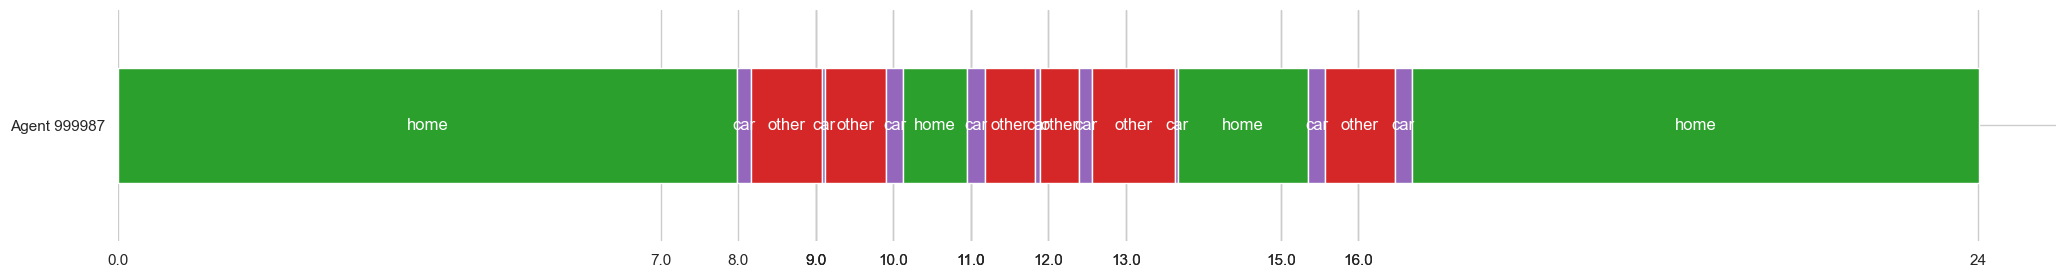

In [32]:
color_dict = {
    'home': 'tab:green',
    'car': 'tab:purple',
    'pt': 'tab:pink',
    'walk' : 'tab:olive',
    'work' : 'tab:blue',
    'bike' : 'tab:orange',
    'other': 'tab:red'
}

fig, ax = plt.subplots(figsize=(25, 3))
 
# Setting Y-axis limits
ax.set_xlim(0, 25)
ax.set_ylim(-2, 2)
#sns.scatterplot(df_tst, y='PId', x='time', ax=ax)
ax.broken_barh(list(zip(df_tst.time_start, df_tst.time)), (-1, 2), 
               facecolors =[color_dict[x] for x in df_tst.act])
for x1, x2, act in df_tst[['time_start', 'time', 'act']].values:
    ax.text(x=x1 + x2/2,  
            y=0,
            s=act, 
            ha='center', 
            va='center',
            color='white',
            )
ax.set_xticks([np.floor(x) for x in df_tst.time_start] + [24], 
              labels=[np.floor(x) for x in df_tst.time_start] + [24]) 
ax.set_yticks([0], labels=[f'Agent 999987']) 
plt.box(on=None)
plt.show()